In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
original_df = pd.read_csv("./data/processed_movie_data.csv", delimiter=';', encoding='utf-8')
original_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0,303,0.112121,1995,10,0,0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0,395,-0.218750,1995,12,4,1
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0,270,0.600000,1995,12,4,2
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0,335,-0.053571,1995,12,4,3
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0,448,-0.116667,1995,12,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2196531.0,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",0.947509,1.0,1.0,2005-12-30,2411594.0,107.0,1.0,5.6,10.0,669,0.102083,2005,12,4,2
4681,12000000.0,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,1.0,1.0,2007-06-14,19000000.0,185.0,2.0,6.9,25.0,117,-0.055556,2007,6,3,3
4682,800000.0,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",0.903061,0.0,0.0,2006-11-23,1328612.0,100.0,1.0,5.8,6.0,378,0.380000,2006,11,3,2
4683,2000000.0,Romance,tt1718881,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,1.0,1.0,2010-09-30,1268793.0,107.0,1.0,4.0,3.0,534,0.000000,2010,9,3,9


In [3]:
df = original_df.copy()

In [4]:
from utils.kohonen.kohonen import build_kohonen_net
from utils.kohonen.neuron_neighbours import prop2iters_neighbour_radius, relu_like_neighbour_radius, exp_neighbour_radius
from utils.kohonen.neuron_lr import inv2iter_learning_rate, fixed_learning_rate

In [5]:
seed = 195

In [6]:
init_f = "random"
init_with_sample = True
picker_f = "random shuffle"
neighbour_f = prop2iters_neighbour_radius
lr_f = inv2iter_learning_rate
grid_type = "hexagonal"

In [7]:
random_state = np.random.default_rng(seed)

In [8]:
cols = ["budget", "popularity", "production_companies", 
        "production_countries", "revenue", "runtime", 
        "spoken_languages", "vote_average", "vote_count",
        "overview_length", "sentiment", "year",
        "month", "weekday", "genre_id"]

In [9]:
len(cols)

15

In [10]:
to_normalize = cols
for i in range(len(to_normalize)):
    df[to_normalize[i]] = (df[to_normalize[i]] - df[to_normalize[i]].mean()) / df[to_normalize[i]].std()
df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,-0.030242,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",2.297018,-0.888981,-0.467054,1995-10-30,1.813769,-1.351069,-0.528057,1.573598,3.973387,-0.003497,0.312006,-0.291643,0.885889,-2.399597,-1.326392
1,0.850490,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,1.420062,0.025974,-0.467054,1995-12-15,1.108865,-0.287850,0.534179,0.686010,1.436552,0.570333,-1.197489,-0.291643,1.475559,0.619027,-1.021418
2,-0.382535,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",-0.919488,-0.888981,-0.467054,1995-12-22,-0.045295,0.775369,-0.528057,-0.201578,-0.573818,-0.209328,2.537798,-0.291643,1.475559,0.619027,-0.716444
3,0.724671,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",1.581780,0.025974,-0.467054,1995-12-15,0.629238,2.763126,0.534179,1.573598,0.991211,0.196096,-0.443914,-0.291643,1.475559,0.619027,-0.411471
4,0.095577,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,-0.675489,0.025974,-0.467054,1995-12-22,-0.154140,-0.195396,-0.528057,-0.867269,-0.455512,0.900909,-0.731766,-0.291643,1.475559,0.619027,-0.411471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,-0.729883,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",-1.437329,-0.888981,-0.467054,2005-12-30,-0.548344,-0.149169,-0.528057,-0.756321,-0.594100,2.279350,0.266211,0.343454,1.475559,0.619027,-0.716444
4681,-0.483190,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,-1.370451,-0.888981,-0.467054,2007-06-14,-0.442768,3.456530,0.534179,0.686010,-0.581424,-1.163633,-0.452966,0.470473,-0.293450,-0.135629,-0.411471
4682,-0.765025,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",-1.445233,-1.346458,-1.755714,2006-11-23,-0.555237,-0.472758,-0.528057,-0.534424,-0.597480,0.464299,1.534118,0.406964,1.180724,-0.135629,-0.716444
4683,-0.734828,Romance,tt1718881,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",-1.584158,-0.888981,-0.467054,2010-09-30,-0.555617,-0.149169,-0.528057,-2.531497,-0.600015,1.437316,-0.199512,0.661002,0.591054,-0.135629,1.418372


In [11]:
kohonen_net = build_kohonen_net(df, cols, 4, len(cols)*500, 
                                init_f, picker_f, 
                                neighbour_f, lr_f, 
                                grid_type, random_state, True, len(cols)*10)

In [12]:
import matplotlib.pyplot as plt

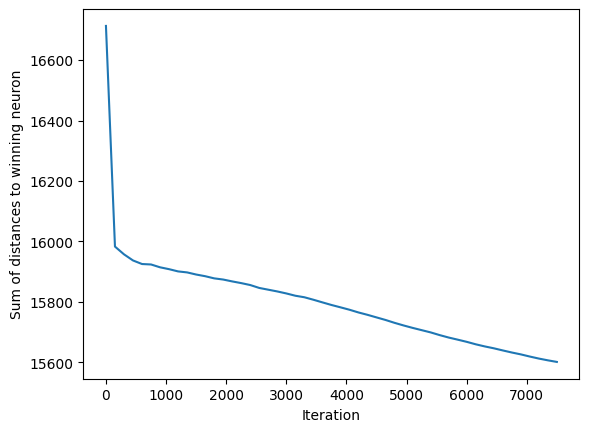

In [13]:
x_sum_dists = [t[0] for t in kohonen_net.sum_dists]
y_sum_dists = [t[1] for t in kohonen_net.sum_dists]
plt.xlabel("Iteration")
plt.ylabel("Sum of distances to winning neuron")
plt.plot(x_sum_dists, y_sum_dists)

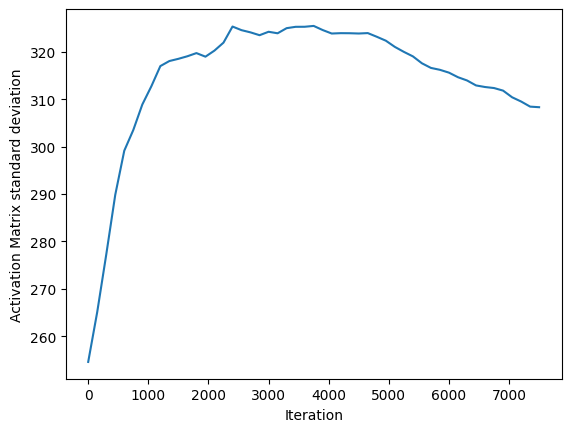

In [14]:
x_act_mat_sigmas = [t[0] for t in kohonen_net.act_mat_sigmas]
y_act_mat_sigmas = [t[1] for t in kohonen_net.act_mat_sigmas]
x_act_mat_sigmas = np.array(x_act_mat_sigmas)
y_act_mat_sigmas = np.array(y_act_mat_sigmas)
plt.xlabel("Iteration")
plt.ylabel("Activation Matrix standard deviation")
plt.plot(x_act_mat_sigmas, y_act_mat_sigmas)

In [15]:
act_mat = kohonen_net.activations_mat(df)
act_mat

array([[925, 116, 129, 289],
       [219,  19,  18, 878],
       [221,   9,  16,  56],
       [730, 436,  53, 571]])

In [16]:
act_map = kohonen_net.activations_map(df)
act_map

{(1, 3): [0,
  1,
  5,
  7,
  14,
  17,
  24,
  25,
  30,
  39,
  49,
  51,
  58,
  76,
  91,
  98,
  105,
  115,
  120,
  123,
  126,
  131,
  145,
  158,
  178,
  192,
  193,
  195,
  198,
  206,
  216,
  217,
  246,
  250,
  272,
  305,
  328,
  332,
  345,
  348,
  350,
  351,
  352,
  358,
  360,
  364,
  365,
  371,
  380,
  388,
  395,
  401,
  409,
  411,
  414,
  425,
  432,
  438,
  467,
  470,
  473,
  474,
  476,
  479,
  490,
  499,
  513,
  514,
  527,
  528,
  533,
  564,
  569,
  572,
  573,
  577,
  578,
  632,
  640,
  642,
  643,
  648,
  652,
  678,
  687,
  728,
  746,
  758,
  798,
  806,
  858,
  859,
  868,
  871,
  872,
  873,
  874,
  880,
  881,
  884,
  887,
  901,
  912,
  918,
  924,
  938,
  947,
  972,
  979,
  995,
  1000,
  1001,
  1011,
  1018,
  1021,
  1022,
  1058,
  1128,
  1130,
  1143,
  1150,
  1154,
  1158,
  1180,
  1194,
  1196,
  1207,
  1222,
  1233,
  1240,
  1243,
  1246,
  1251,
  1254,
  1255,
  1257,
  1259,
  1269,
  1272,
  1300,
  

In [17]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

display(df.iloc[act_map[(0,0)]])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
4,0.095577,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,-0.675489,0.025974,-0.467054,1995-12-22,-0.154140,-0.195396,-0.528057,-0.867269,-0.455512,0.900909,-0.731766,-0.291643,1.475559,0.619027,-0.411471
10,-0.684500,Crime,tt0113101,Four Rooms,It's Ted the Bellhop's first night on the job....,-0.000620,-0.431503,-0.467054,1995-12-09,-0.536325,-0.565212,-0.528057,0.242216,-0.147069,-0.415158,-1.043515,-0.291643,1.475559,1.373684,0.198477
11,-0.030242,Crime,tt0112281,Ace Ventura: When Nature Calls,"Summoned from an ashram in Tibet, Ace finds hi...",-0.146644,0.025974,-0.467054,1995-11-10,0.788022,-0.935027,-0.528057,-0.201578,0.350664,0.221045,-1.710734,-0.291643,1.180724,0.619027,0.198477
12,0.724671,Action,tt0113845,Money Train,A vengeful New York transit cop decides to ste...,-0.300919,-0.888981,-0.467054,1995-11-21,-0.338193,-0.334077,-0.528057,-0.978218,-0.413259,-1.063836,-0.116563,-0.291643,1.180724,-1.644941,-0.411471
15,-0.694566,Drama,tt0113627,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",0.231527,-0.431503,-0.467054,1995-10-27,-0.246743,0.081965,-0.528057,0.907907,-0.294107,-0.408921,-1.340057,-0.291643,0.885889,0.619027,-0.106497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4679,-0.734828,Comedy,tt1820462,Beremennyy,The main character of the film Sergey Dobrolyu...,-1.535208,-1.346458,-0.467054,2011-07-21,-0.512777,-1.351069,-0.528057,-3.530034,-0.596635,3.857384,0.194820,0.724512,0.001384,-0.135629,-0.716444
4680,-0.729883,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",-1.437329,-0.888981,-0.467054,2005-12-30,-0.548344,-0.149169,-0.528057,-0.756321,-0.594100,2.279350,0.266211,0.343454,1.475559,0.619027,-0.716444
4682,-0.765025,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",-1.445233,-1.346458,-1.755714,2006-11-23,-0.555237,-0.472758,-0.528057,-0.534424,-0.597480,0.464299,1.534118,0.406964,1.180724,-0.135629,-0.716444
4683,-0.734828,Romance,tt1718881,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",-1.584158,-0.888981,-0.467054,2010-09-30,-0.555617,-0.149169,-0.528057,-2.531497,-0.600015,1.437316,-0.199512,0.661002,0.591054,-0.135629,1.418372


In [18]:
u_mat = kohonen_net.u_mat()
u_mat

array([[0.35975198, 0.32064467, 0.33867839, 0.37123656],
       [0.34266621, 0.33710142, 0.38715488, 0.56050469],
       [0.31784837, 0.34344404, 0.36361925, 0.42852898],
       [0.40129464, 0.37914884, 0.34159431, 0.33105437]])

In [19]:
from utils.kohonen.plots import plot_u_mat, plot_mat

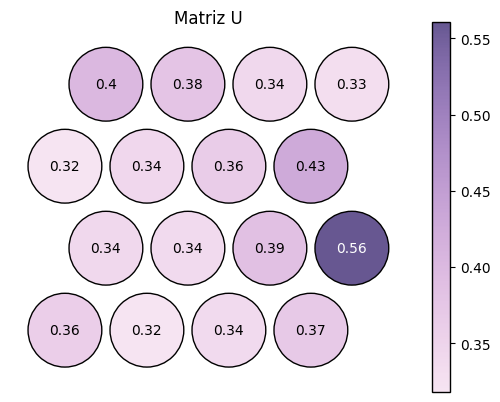

In [20]:
plot_u_mat(kohonen_net, u_mat)

In [21]:
kohonen_net.neuron_weights

array([[[-2.20878716e-01, -2.18278191e-01, -1.69055915e-01,
         -1.44937923e-01, -1.94563602e-01, -1.06600409e-01,
         -1.19073955e-01, -1.03409137e-01, -2.08249579e-01,
          1.10754999e-01, -4.24418077e-02,  9.45244474e-03,
          3.21999016e-01,  1.27128545e-01,  2.30243868e-01],
        [-7.62770477e-02, -6.11395432e-02, -4.54302186e-02,
         -2.32609677e-02, -8.78548015e-02, -3.21371266e-02,
         -4.49122030e-02, -4.31376705e-02, -1.00810973e-01,
          9.44858363e-02, -3.23750809e-03,  6.27983204e-02,
          2.18901330e-01,  5.75684791e-02,  6.94686411e-02],
        [ 7.94608147e-02,  1.08114648e-01,  1.06786041e-01,
          9.53912985e-02,  3.87398738e-02,  2.50853106e-02,
          2.10628213e-03,  4.91412111e-02,  5.91427855e-02,
          1.91572755e-02, -1.23493894e-03,  1.23196494e-01,
          1.71351222e-01,  7.24882399e-03,  4.76194155e-03],
        [ 2.23818079e-01,  2.95777876e-01,  3.04534327e-01,
          1.83023546e-01,  1.83812425

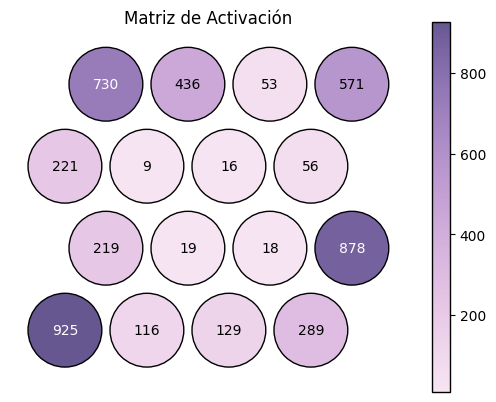

In [22]:
plot_mat(kohonen_net, act_mat, "Matriz de Activación")

In [23]:
kohonen_net.init_neuron_weights

array([[[-0.93129922, -0.83151785,  0.56739663, -0.39825199,
          0.21234604, -0.65795565, -0.6677202 ,  0.29761236,
          0.16375759,  0.27919032, -0.26037655, -0.99455519,
          0.91109582,  0.40617248,  0.57914189],
        [ 0.08939237,  0.18377603,  0.20086837,  0.69610207,
          0.2796443 , -0.65430846,  0.46922423, -0.66013457,
         -0.69205186,  0.96091125,  0.26138907,  0.59312564,
         -0.2543576 , -0.86439745, -0.7371128 ],
        [ 0.43728287, -0.24989942, -0.97896604,  0.74611708,
         -0.90196397, -0.48600425, -0.16496867,  0.67500314,
         -0.4103209 ,  0.26095353,  0.12643126, -0.01187419,
         -0.28118323, -0.5939301 ,  0.54976351],
        [ 0.20418703,  0.6854531 ,  0.9885529 , -0.93504635,
         -0.42355706,  0.80812619, -0.93319802,  0.7562547 ,
         -0.42961267,  0.46991994, -0.65720633, -0.54432936,
          0.32378534,  0.03132573,  0.64031452]],

       [[ 0.6298877 ,  0.3792664 , -0.99980274,  0.7085323 ,
         

In [24]:
kohonen_net.neuron_positions[0,0]

array([0., 0.])

In [25]:
from utils.distance import euclidean_distance

if init_with_sample:
    init_sample = dict()
    sample_to_neu = dict()

    for idx, sample in df.iterrows():
        sample_df = sample.to_frame().T
        X_p = sample_df[cols].to_numpy().astype(float)
        for i in range(kohonen_net.k):
            for j in range(kohonen_net.k):
                dist = euclidean_distance(np.reshape(X_p, (X_p.size,)), np.reshape(kohonen_net.init_neuron_weights[i, j], (X_p.size,)))
                if dist <= np.finfo(float).eps:
                    init_sample[(i, j)] = idx
                    sample_to_neu[idx] = (i, j)

    display(init_sample)

{}

In [26]:
if init_with_sample:
    init_sample_vals = list(init_sample.values())
    display(original_df.iloc[init_sample_vals])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id


In [27]:
from utils.pca import pca, plot_pca
import seaborn as sns

In [28]:
pca_data = pca(original_df, cols)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pauli/Git/unsupervised-learning/utils/pca.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data.xs[i], pca_data.ys[i], s=200, label=varnames, c=colors[i])


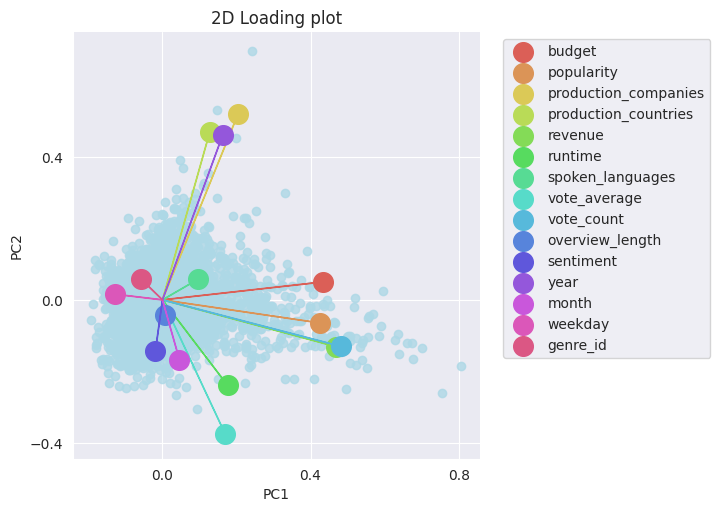

In [29]:
if init_with_sample:
    data = pca_data.pca_df_scaled.iloc[init_sample_vals].to_numpy()
    sns.set_style("darkgrid")
    plot_pca(pca_data)
    plt.scatter(data[:,0], data[:, 1], color="k")
    for i in range(data.shape[0]):
        plt.annotate("{}".format(i), xy=(data[i, 0], data[i, 1]), 
                    textcoords="data", ha="center", va="bottom", color="k")

In [30]:
if init_with_sample:
    vals_dict = dict()
    vals_dict["Neuron"] = []
    for i in range(len(init_sample_vals)):
        vals_dict["Neuron"].append(sample_to_neu[init_sample_vals[i]])
    vals_dict_df = pd.DataFrame(data=vals_dict)
    display(vals_dict_df)

,Neuron


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pauli/Git/unsupervised-learning/utils/pca.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data.xs[i], pca_data.ys[i], s=200, label=varnames, c=colors[i])
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pauli/Git/unsupervised-learning/utils/pca.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its leng

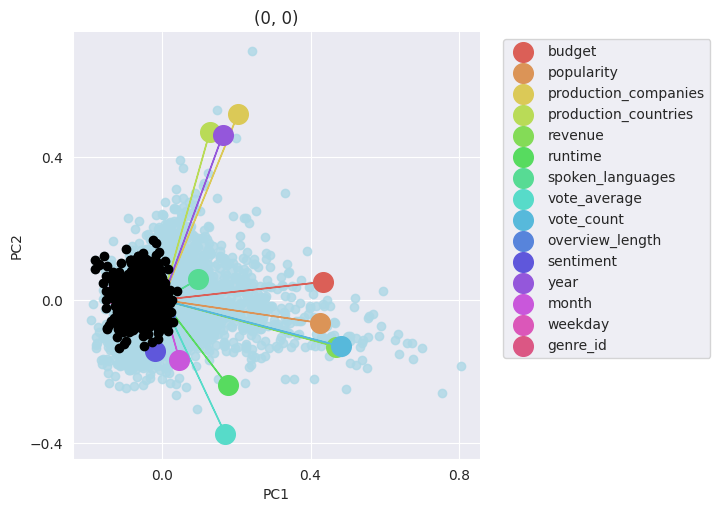

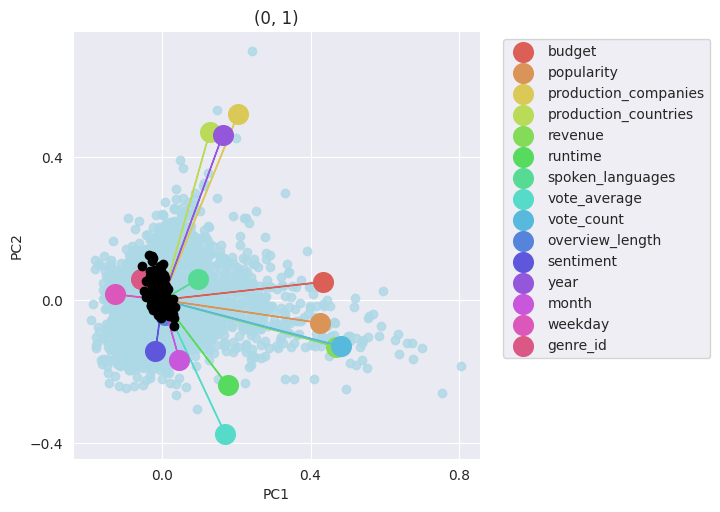

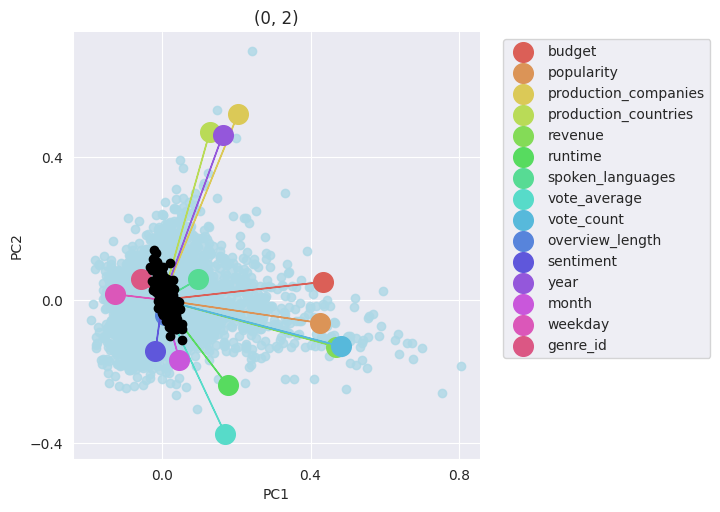

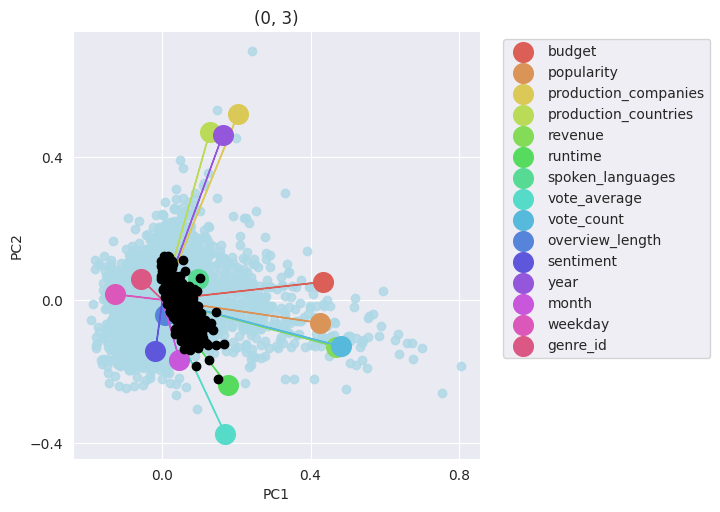

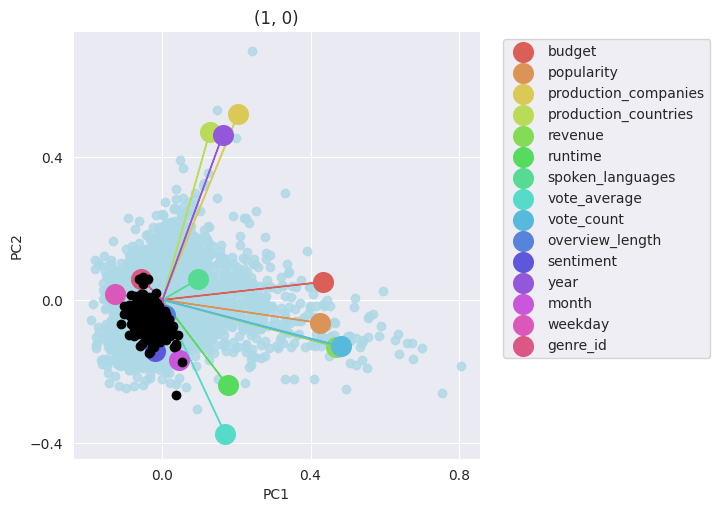

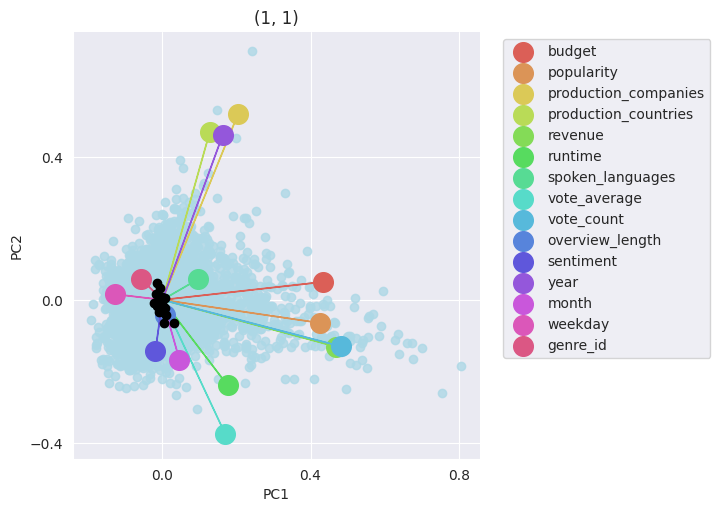

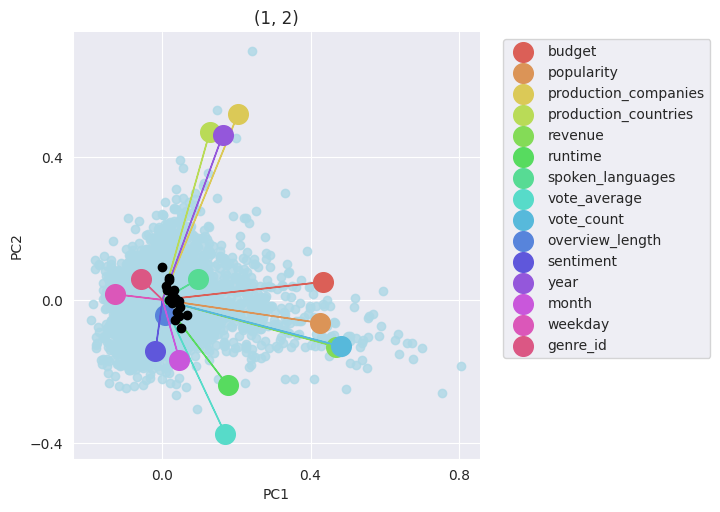

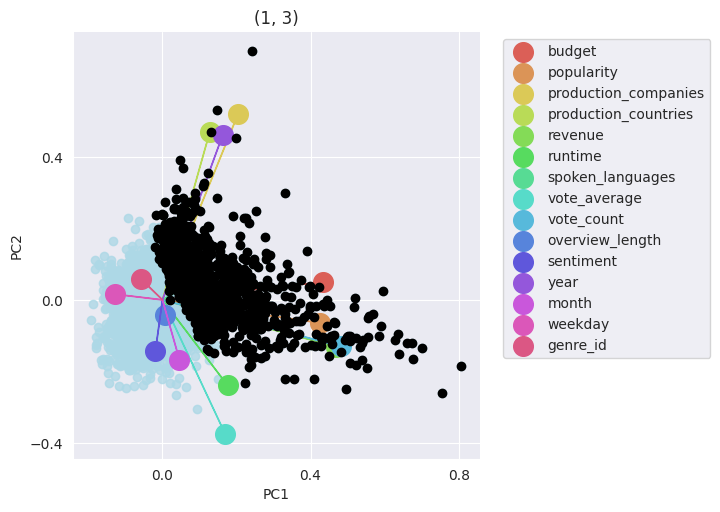

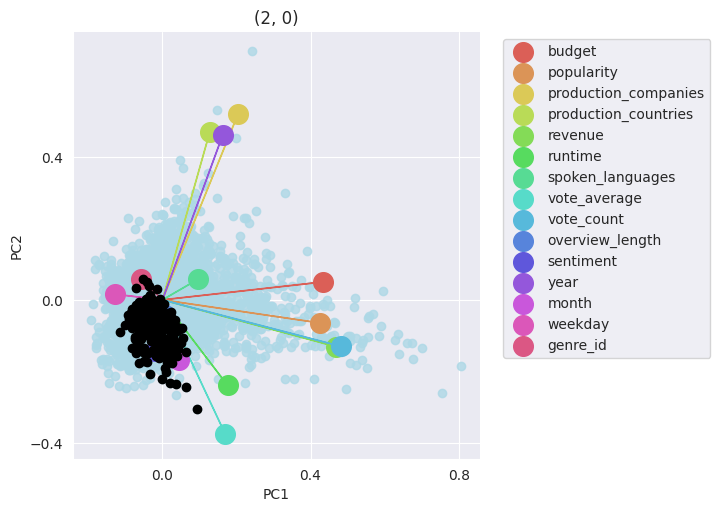

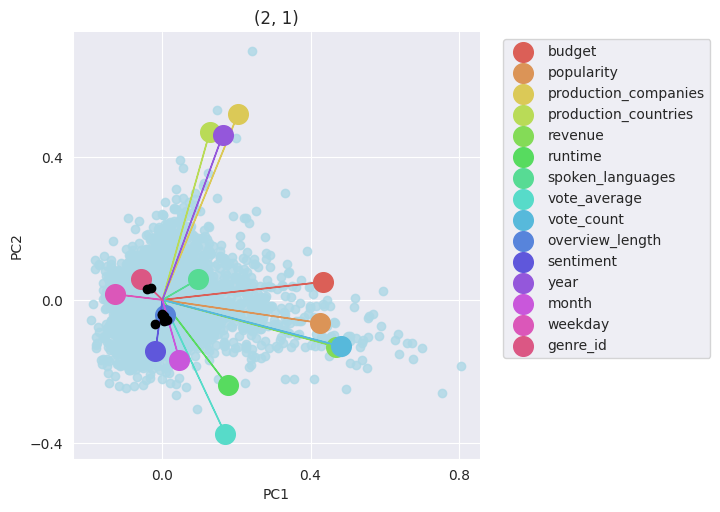

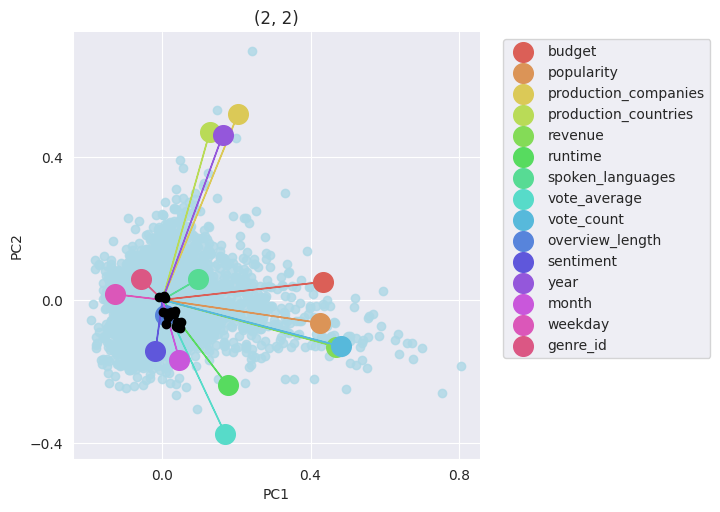

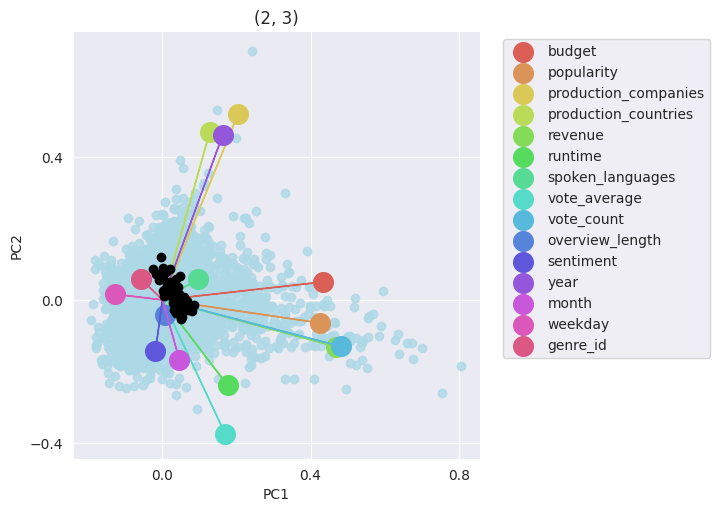

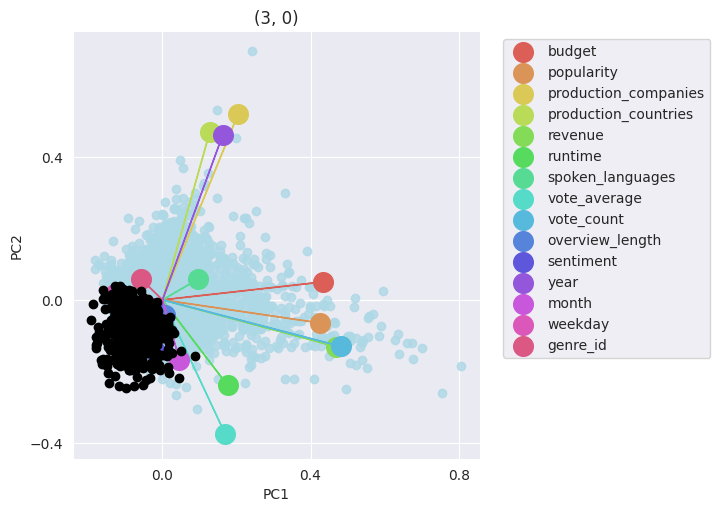

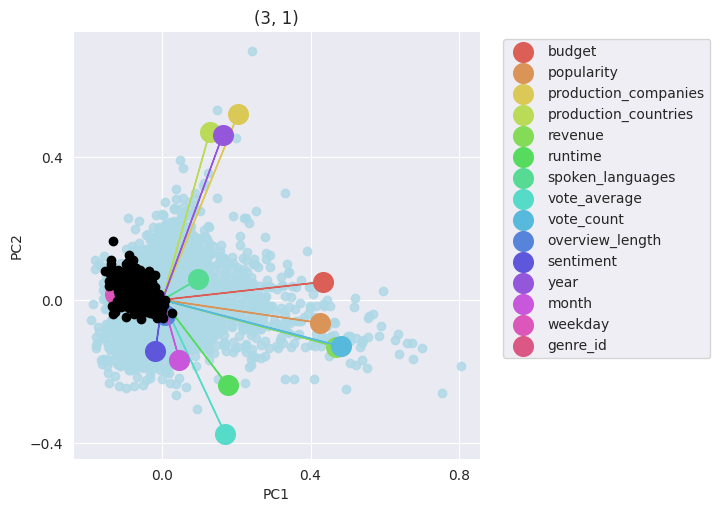

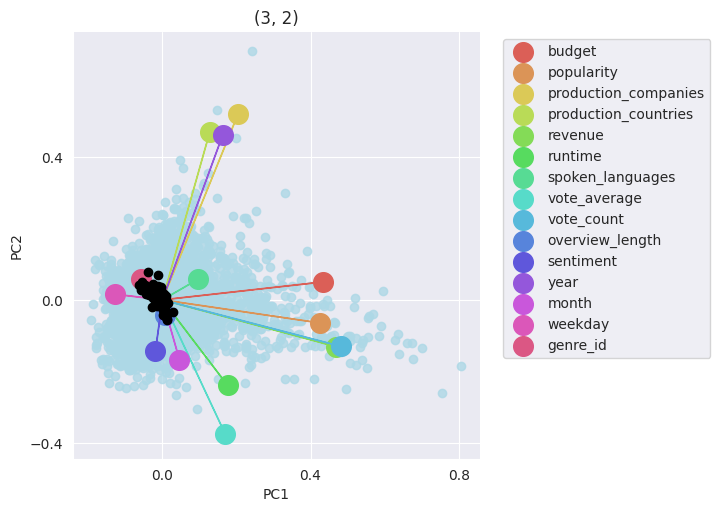

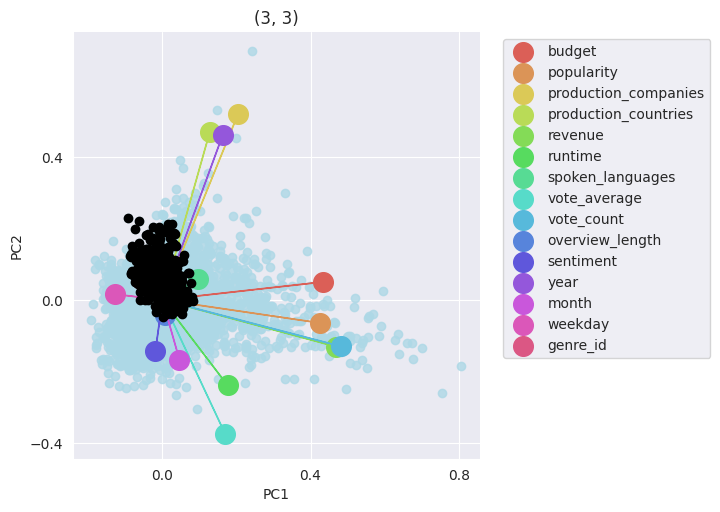

In [31]:
if init_with_sample:
    for i in range(kohonen_net.k):
        for j in range(kohonen_net.k):
            curr_neu = (i, j)
            data = pca_data.pca_df_scaled.iloc[act_map[curr_neu]].to_numpy()
            sns.set_style("darkgrid")
            plot_pca(pca_data)
            plt.scatter(data[:,0], data[:, 1], color="k")
            plt.title("{}".format(curr_neu))
            plt.savefig("neuplots/biplot-neu-{}.png".format(curr_neu), bbox_inches='tight', dpi=1200)
            

In [32]:
production_comp_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=float)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["production_companies"]
                cell_count += 1
        if cell_count != 0:
            production_comp_mat[i, j] = cell_sum / cell_count

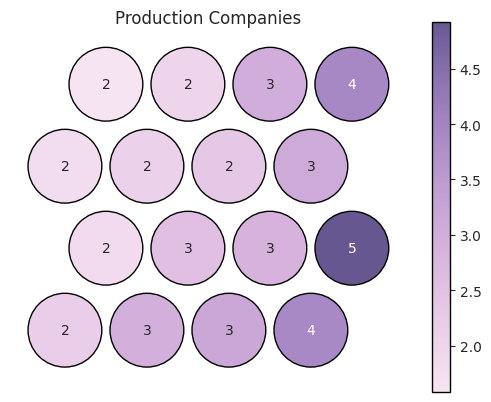

In [33]:
plot_mat(kohonen_net, production_comp_mat, "Production Companies", "{:.1g}")

In [34]:
year_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["year"]
                cell_count += 1
        if cell_count != 0:
            year_mat[i, j] = cell_sum / cell_count

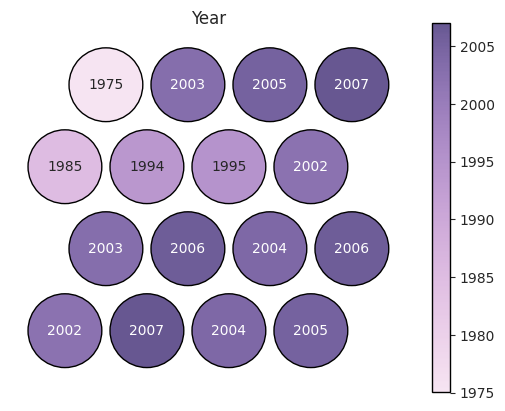

In [35]:
plot_mat(kohonen_net, year_mat, "Year")

In [36]:
popularity_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=float)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["popularity"]
                cell_count += 1
        if cell_count != 0:
            popularity_mat[i, j] = cell_sum / cell_count

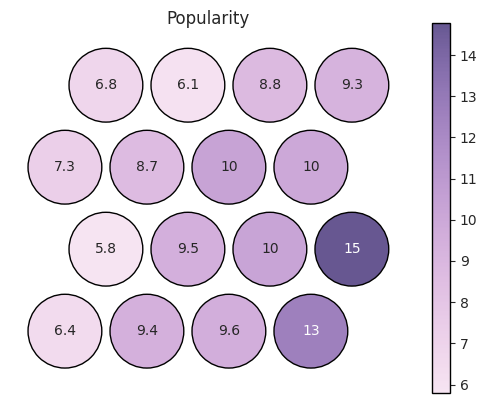

In [37]:
plot_mat(kohonen_net, popularity_mat, "Popularity", "{:.2g}")

In [38]:
revenue_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=float)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["revenue"]
                cell_count += 1
        if cell_count != 0:
            revenue_mat[i, j] = cell_sum / cell_count

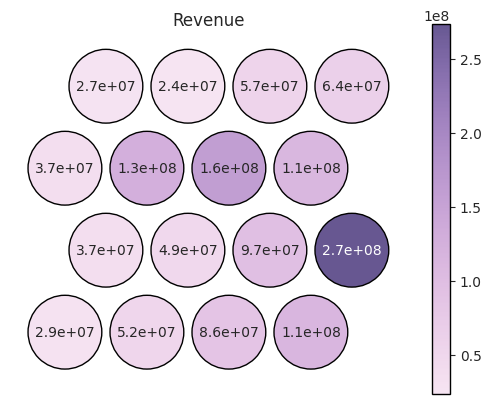

In [39]:
plot_mat(kohonen_net, revenue_mat, "Revenue", "{:.2g}")

In [40]:
vote_count_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["vote_count"]
                cell_count += 1
        if cell_count != 0:
            vote_count_mat[i, j] = cell_sum / cell_count

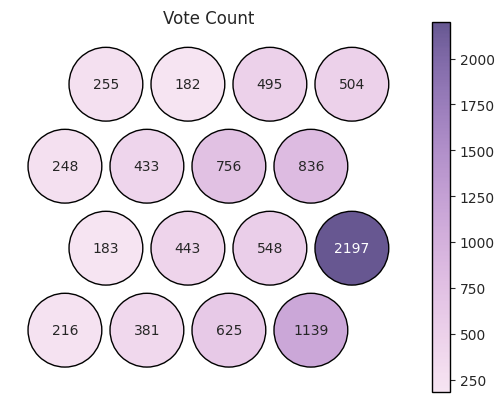

In [41]:
plot_mat(kohonen_net, vote_count_mat, "Vote Count")